In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
acc_32e = {'Test Router': ['Top-1', 'Top-1+LR', 'Top-1+KR', 'Top-1+KR+LR', 'Top-2', 'Top-2+LR', 'Top-2+KR', 'Top-2+KR+LR'], 'MMLU': [31.8, 35.89, 31.92, 36.12, 33.57, 36.8, 34.32, 36.79], 'SuperGLUE': [61.94, 63.9, 60.51, 63.9, 61.65, 62.84, 62.35, 63.41], 'TruthfulQA': [30.35, 31.57, 31.08, 31.33, 30.72, 29.03, 29.25, 31.57], 'LogicQA': [27.34, 29.95, 28.72, 28.57, 29.33, 29.8, 29.03, 30.41]}
acc_8e = {'Test Router': ['Top-1', 'Top-1+LR', 'Top-1+KR', 'Top-1+KR+LR', 'Top-2', 'Top-2+LR', 'Top-2+KR', 'Top-2+KR+LR'], 'MMLU': [33.05, 36.21, 33.28, 36.4, 35.39, 35.7, 35.96, 36.14], 'SuperGLUE': [64.34, 64.64, 62.76, 63.94, 64.58, 64.4, 65.37, 65.16], 'TruthfulQA': [29.49, 29.86, 28.51, 29.98, 29.98, 30.47, 30.35, 30.35], 'LogicQA': [28.11, 29.18, 29.49, 29.8, 29.33, 29.95, 30.26, 31.49]}

In [3]:
def swap_elements(lst, index1, index2):
    # 获取需要交换的两个元素值
    element1 = lst[index1]
    element2 = lst[index2]

    # 交换两个元素的值
    lst[index1] = element2
    lst[index2] = element1

In [4]:
routers = acc_32e['Test Router']
swap_elements(routers, 1,2)
swap_elements(routers, 5,6)

In [5]:
swap_elements(acc_8e['MMLU'], 1,2)
swap_elements(acc_8e['MMLU'], 5,6)
swap_elements(acc_32e['MMLU'], 1,2)
swap_elements(acc_32e['MMLU'], 5,6)

swap_elements(acc_8e['SuperGLUE'], 1,2)
swap_elements(acc_8e['SuperGLUE'], 5,6)
swap_elements(acc_32e['SuperGLUE'], 1,2)
swap_elements(acc_32e['SuperGLUE'], 5,6)

swap_elements(acc_8e['TruthfulQA'], 1,2)
swap_elements(acc_8e['TruthfulQA'], 5,6)
swap_elements(acc_32e['TruthfulQA'], 1,2)
swap_elements(acc_32e['TruthfulQA'], 5,6)

swap_elements(acc_8e['LogicQA'], 1,2)
swap_elements(acc_8e['LogicQA'], 5,6)
swap_elements(acc_32e['LogicQA'], 1,2)
swap_elements(acc_32e['LogicQA'], 5,6)

In [6]:
mmlu = [{'8 experts':x, '32 experts':y}  for x,y in zip(acc_8e['MMLU'], acc_32e['MMLU'])]
superglue = [{'8 experts':x, '32 experts':y}  for x,y in zip(acc_8e['SuperGLUE'], acc_32e['SuperGLUE'])]
truthfulqa = [{'8 experts':x, '32 experts':y}  for x,y in zip(acc_8e['TruthfulQA'], acc_32e['TruthfulQA'])]
logiqa = [{'8 experts':x, '32 experts':y}  for x,y in zip(acc_8e['LogicQA'], acc_32e['LogicQA'])]

In [7]:
from matplotlib.colors import LinearSegmentedColormap

def create_gradient_cmap(color1, color2, num_colors):
    # 创建两种颜色之间的渐变颜色映射
    cmap = LinearSegmentedColormap.from_list('gradient_cmap', [color1, color2], N=num_colors)
    return cmap

In [8]:
def draw_bar(data_list, data_labels, figure_title, figure_name, colors):
    # 提取横坐标标签和数值
    categories = list(data_list[0].keys())
    num_categories = len(categories)
    
    plt.figure(figsize=(10, 8))

    # 设置柱状图的宽度
    bar_width = 1.0 / (len(data_list) + 1)
    cmap_0 = create_gradient_cmap(colors[-1], 'blue', 4)
    cmap_1 = create_gradient_cmap(colors[-2], 'green', 4)

    # 绘制柱状图
    min_value, max_value = 100, 0
    for i, data in enumerate(data_list):
        values = list(data.values())
        if i<4:
            color = cmap_0(i%4)
        else:
            color = cmap_1(i%4)
        plt.bar([x + i*bar_width for x in range(num_categories)], values, width=bar_width, label=data_labels[i], color=color)
        min_value = min(min_value, min(values))
        max_value = max(max_value, max(values))
    # 添加标题、标签和图例
    plt.title(figure_title)
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    min_value = min_value-3
    max_value = max_value+3
    plt.ylim(min_value, max_value)
    plt.legend(ncol=2)

    # 调整横坐标标签的显示
    plt.xticks([x + (len(data_list) - 1) * bar_width/2 for x in range(num_categories)], categories)

    # 显示图形
    plt.tight_layout()
    plt.savefig(figure_name)
    # plt.close()

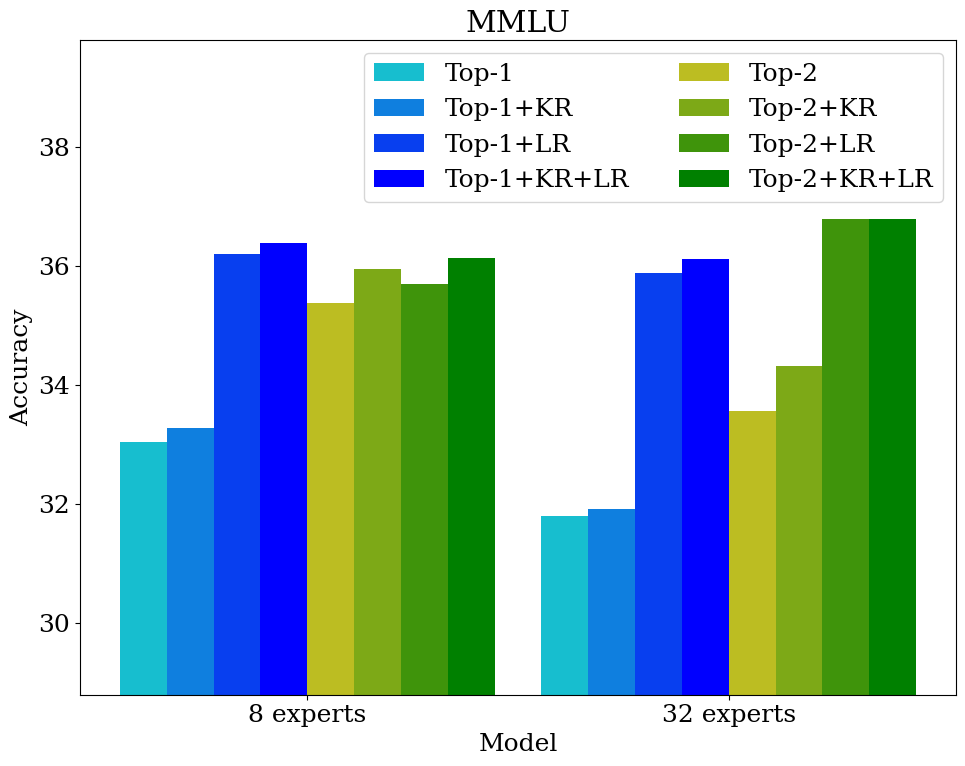

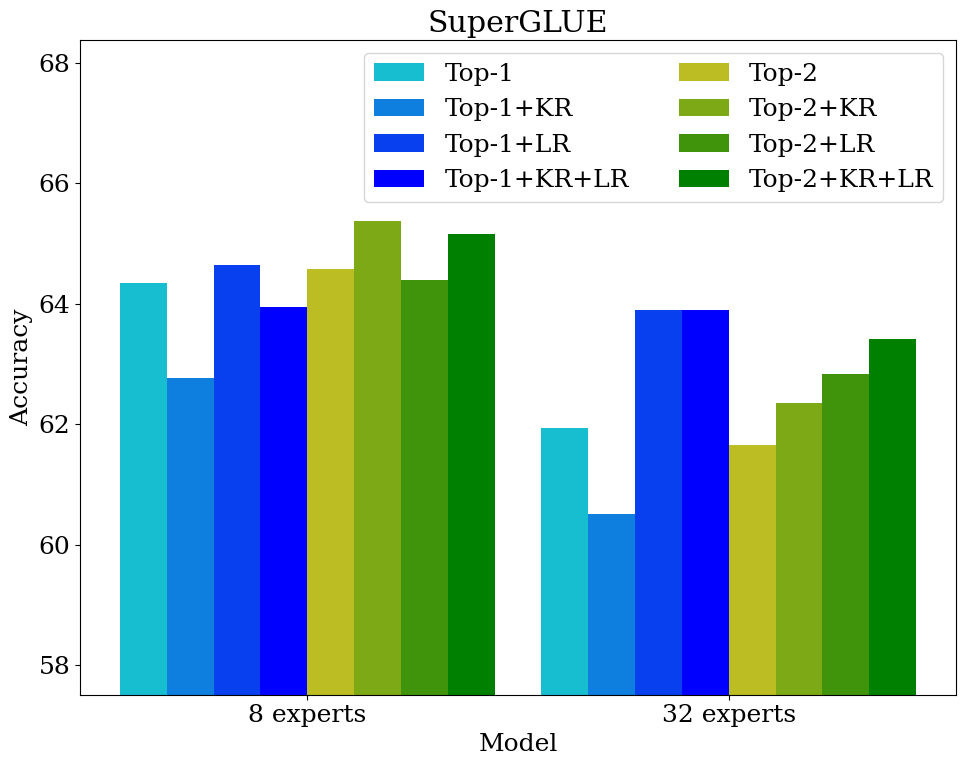

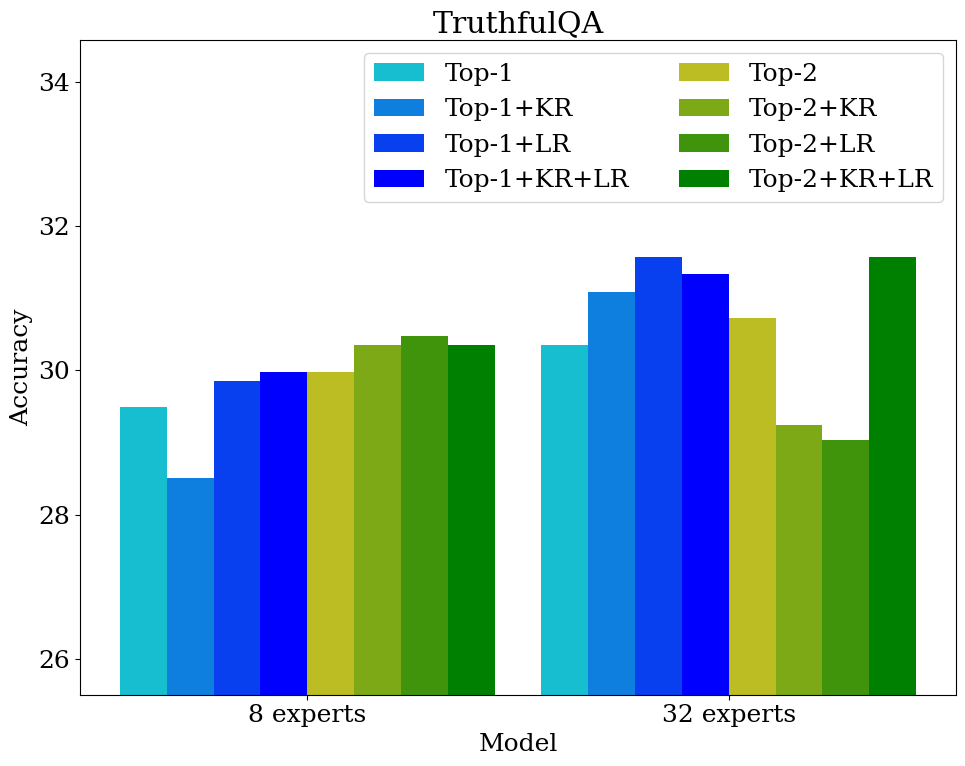

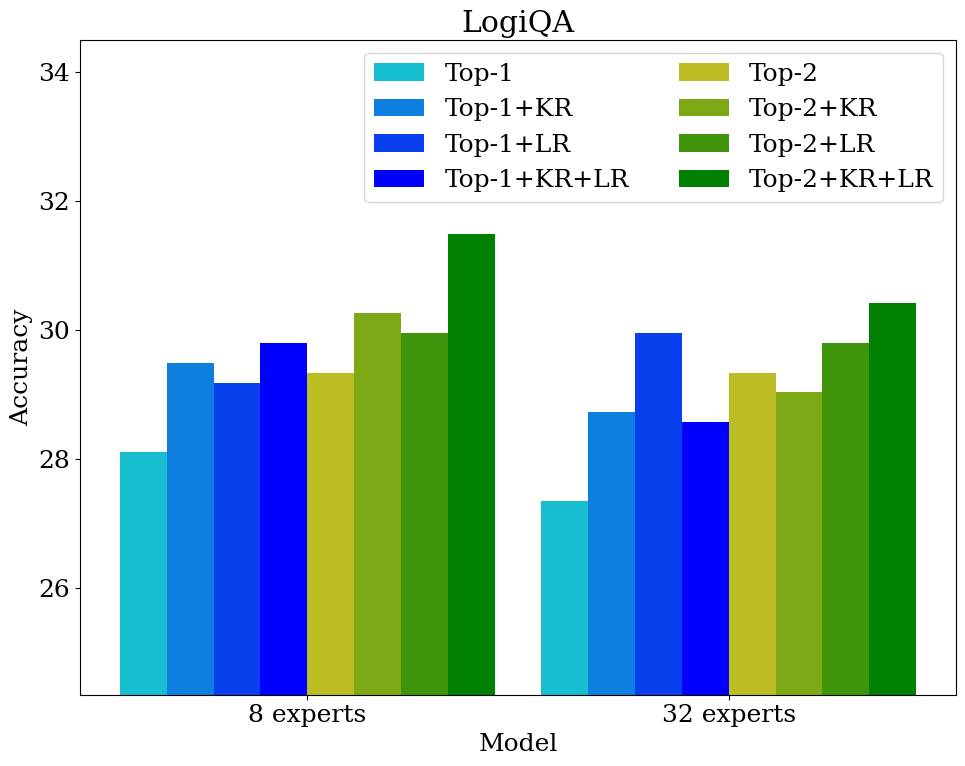

In [10]:
plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'serif'  # 使用衬线字体
colors = sns.color_palette()
draw_bar(mmlu, routers, 'MMLU', 'mmlu.pdf', colors)
draw_bar(superglue, routers, 'SuperGLUE', 'superglue.pdf', colors)
draw_bar(truthfulqa, routers, 'TruthfulQA', 'truthfulqa.pdf', colors)
draw_bar(logiqa, routers, 'LogiQA', 'logiqa.pdf', colors)

# draw_bar(mmlu, routers, 'mmlu.svg', colors[-1], colors[0])
# draw_bar(superglue_8e, superglue_32e, '8 experts', '32 experts', 'SuperGLUE', 'superglue.svg', colors[-2], colors[2])
# draw_bar(truthfulqa_8e, truthfulqa_32e, '8 experts', '32 experts', 'TruthfulQA', 'truthfulqa.svg', colors[-4], colors[-6])
# draw_bar(logiqa_8e, logiqa_32e, '8 experts', '32 experts', 'LogiQA', 'logiqa.svg', colors[3], colors[5])